# Project: Exploring effects of Central Bank's monetary policy 
<div class="alert alert-block alert-info">
by Kirill Ryzhov<br>
February 2018</div>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data">Dataset</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Ideas to explore

The focus of the project is to explore a codependance structure of Central Bank's monetary policy (discount rate, bank rate or interest rate) on other economic factors such as GDP, inflation, unemployement, foreign investments, debt servicing cost, and international trade.  

### Premise

Bank rate has a direct impact on the lending rates offered by commercial banks to the businesses and individual clients, and in theory has direct impact on economy growth and competiteveness. 

High Central bank interest rate attracts may attract foreign investments, and therefore engage the growth of economy. [Ref.](https://en.wikipedia.org/wiki/Federal_funds_rate)

The rates are also often used to manage the country currency supply. Theoretically, bank rate to be reduced as the unemployement increase. Thus, the reduction of the bank rate followed by increase of the employement rate, since businesses and financial institutions get funds at low-priced rates.

Another aspect of monetary policy is inflation, which may be caused by lower interest rate, increased by the amount of borrowing. Inflation causes trade deficit, since it results in higher production cost thus rendering exports in-competitive, which in turn, reduces exports and widens trade deficit.

To confirm the theoretical premises, the report poses the following questions:
1. What is the global trend for GDP and Central Bank interest rates?
2. Does bank interest rate correlates with GDP growth, Investment Inflows, Export and Debt servicing cost?
3. Does interest rate has a direct connection with unemployement rate, tax and inflation?
4. Which of the above factors (incl. Trade Balance) affect tax inflow?

Varaiables:
- Central Bank Interest Rate
- Time 
- GDP
- Debt
- Investment
- Tax Inflow

Methodology:
1. Reduction to a single country / group of countries.
2. Multiple variable explorations.
4. Simple linear regression.
4. Kernel distributions/regressions: kernel_regression.


### Dataset details <a id='data'></a> 
A dataset for analysis falls under Economy category and provided by the World Bank. [Data Source.](https://www.gapminder.org/data/)<br>

The main sub-sets are: 
- Economy 
- Economic situation
- Incomes and growth
- Advanced debt & trade

The actual data tables used in the report.

|Item, no.|Description|Source|Category|Subcategory|
|:-|:-|:-|-|-|
|1|Central bank discount rate (annual %)|UN|Economy|Economic situation|
|2|Tax revenue (% of GDP)|World Bank|Economy|Economic situation|
|3|Investments (% of GDP)|World Bank|Economy|Economic situation|
|4|Inflation (annual %)|World Bank|Economy|Economic situation|
|5|Foreign direct investment, net outflows (% of GDP)|Not Found.|Economy|Economic situation|
|6|Foreign direct investment, net inflows (% of GDP)|World Bank|Economy|Economic situation|
|7|Exports (% of GDP)|World Bank|Economy|Debt & trade|
|8|Imports (% of GDP)|World Bank|Economy|Debt & trade|
|9|Total GDP (PPP$, inflation-adjusted)|Various sources|Economy|Incomes & growth|
|10|External debt, total (USD, not inflation-adjusted)|World Bank|For advanced users|Advanced debt & trade|
|11|Debt servicing costs (% of exports and net income from abroad)|World Bank|For advanced users|Advanced debt & trade|
|12|Long term unemployment rate (%)|International Labour Organization|Work|Unemployment|


Some alternative sources used for the report:
[IMF Historical Public Debt Database](https://www.imf.org/en/Publications/WP/Issues/2016/12/31/A-Historical-Public-Debt-Database-24332)

In [406]:
# Import statements for all of the packages in use.
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# import requests 
# response = requests.get('https://www.udacity.com')
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling
    
Loading the the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [398]:
#Exporting all csvs from the folder

import os 
from os.path import join
df_filelist=[]
for folder, subs, files in os.walk('data/'):
    for file in files:
        df_filelist.append(os.path.join(folder, file))

# Sort the list
df_filelist=sorted(df_filelist)

# Reducing the head print volume
pd.set_option('display.max_columns', 8)

# Multiple outputs. Source goo.gl/e2zSnA
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [391]:
# printing out first lines. Inspecting missing / errant data.
# Reading data on country tax and country inflation
df_tax=pd.read_csv('data/02-tax.csv')
df_inf=pd.read_csv('data/04-inflation.csv')
df_tax.shape, df_tax.head(), df_inf.head(), df_inf.shape

((213, 23),
   Tax revenue (% of GDP)  1990  1991  1992  ...        2008       2009  \
 0            Afghanistan   NaN   NaN   NaN  ...    5.225979   7.266421   
 1                Albania   NaN   NaN   NaN  ...         NaN        NaN   
 2                Algeria   NaN   NaN   NaN  ...   45.255818  34.911834   
 3         American Samoa   NaN   NaN   NaN  ...         NaN        NaN   
 4                Andorra   NaN   NaN   NaN  ...         NaN        NaN   
 
        2010  2011  
 0  8.313807   NaN  
 1       NaN   NaN  
 2       NaN   NaN  
 3       NaN   NaN  
 4       NaN   NaN  
 
 [5 rows x 23 columns],
   Inflation, GDP deflator (annual %)     1961     1962      1963    ...      \
 0                           Abkhazia      NaN      NaN       NaN    ...       
 1                        Afghanistan      NaN      NaN       NaN    ...       
 2              Akrotiri and Dhekelia      NaN      NaN       NaN    ...       
 3                            Albania      NaN      NaN       Na

In [411]:
# Reading and printing data
print ('%*s %*s %*s %*s %*s %*s' % (30,"Title",15,"Countries",8,"Years",8,"From",8,"To",15,"10Y Data Dens"))

# Loooping across all files
for df in df_filelist:
    f=pd.read_csv(df)
    countries=f.iloc[:,0].count()
    period=len(f.columns[:])
    start=f.columns[1]
    end=f.columns[-1]
    name=f.columns[0][:30]
    # calulcating data density - 10years
    null_density=0
    for i in range(f.shape[1]-10,f.shape[1]):
        null_density+=(f.iloc[:, i].count()/len(f.iloc[:, i]))
    print ('%*s %*s %*i %*s %*s %*s' % (30,name.title(),15,countries,8,period,
                                        8,start,8,end,15,round(null_density/10,2)))

                         Title       Countries    Years     From       To   10Y Data Dens
Discount Rate Of Central Bank,             146       60     1948     2006            0.82
        Tax Revenue (% Of Gdp)             213       23     1990     2011            0.45
Gross Capital Formation (% Of              213       53     1960     2011            0.72
Inflation, Gdp Deflator (Annua             270       52     1961     2011            0.71
Foreign Direct Investment, Net             213       53     1960     2011            0.49
Foreign Direct Investment, Net             213       43     1970     2011            0.78
Exports Of Goods And Services              275       52     1961     2011            0.64
Imports Of Goods And Services              213       53     1960     2011            0.74
Real Gdp Per Capita Ppp 2005 P             188       56     1950     2004            0.92
Gdp Per Capity, 2005 Ppp, Wb D             260       33     1980     2011             0.7
          

In [409]:
# Reading and printing data

columns=[]


# Loooping across all files
for df in df_filelist:
    f=pd.read_csv(df)
    countries=f.iloc[:,0].count()
    period=len(f.columns[:])
    start=f.columns[1]
    end=f.columns[-1]
    name=f.columns[0][:30]
    # getting data density
    null_density=0
    for i in range(f.shape[1]-10,f.shape[1]):
        null_density+=(f.iloc[:, i].count()/len(f.iloc[:, i]))
    
    df_infop=pd.DataFrame({"Title","Countries","Years","From","To","10Y Data Dens"
                           name.title(),countries,period,start,end,round(null_density/10,2))
    
    print (df_info)

Discount Rate Of Central Bank,             146       60     1948     2006            0.82
        Tax Revenue (% Of Gdp)             213       23     1990     2011            0.45
Gross Capital Formation (% Of              213       53     1960     2011            0.72
Inflation, Gdp Deflator (Annua             270       52     1961     2011            0.71
Foreign Direct Investment, Net             213       53     1960     2011            0.49
Foreign Direct Investment, Net             213       43     1970     2011            0.78
Exports Of Goods And Services              275       52     1961     2011            0.64
Imports Of Goods And Services              213       53     1960     2011            0.74
Real Gdp Per Capita Ppp 2005 P             188       56     1950     2004            0.92
Gdp Per Capity, 2005 Ppp, Wb D             260       33     1980     2011             0.7
                Total Gdp, Ppp             260      215     1800     2013            0.81
          

AttributeError: Unknown property figsize

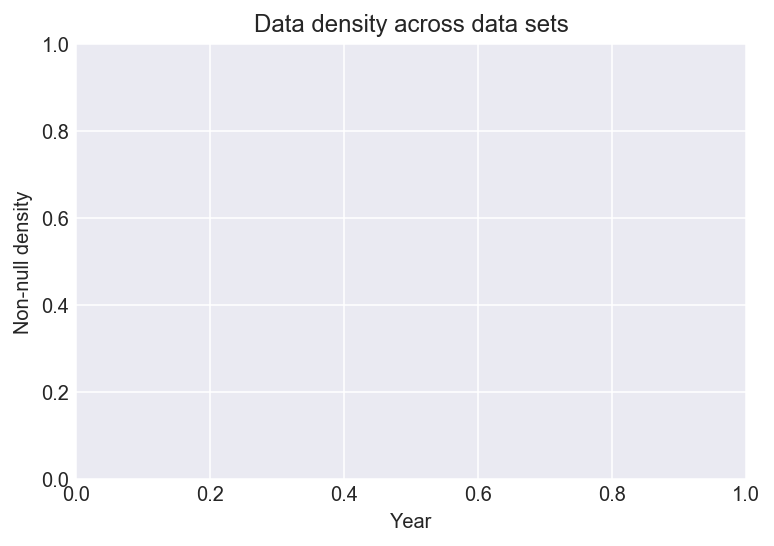

In [405]:
# creating null-value density plots for each dataset

def null_density (df):
    period = []
    null_dens = []
    for i in [i for i in range(df.shape[1]) if i!=0]:
        null_dens.append(df.iloc[:, i].count()/len(df.iloc[:, i]))
        period.append(int(df.columns[i])) 

    # plotting results
    
    plt.title("Data density across data sets")
    plt.xlabel("Year")
    plt.ylabel("Non-null density")
    axes = plt.gca()
    axes.set_ylim([0, 1])
    plt.plot(period, null_dens, figsize=(50,50))
    #plt.title(f.columns[0]+". Data density")
    #display(plt.show())

# Calling the plotting function
for df in df_filelist:
    f=pd.read_csv(df)
    null_density(f)

#### Interim observation
A significant portion of dataset has values Missing At Random. Other features observed in the data set includes: 
- coverage of different time-period 1948-2006, 1990-2011, 1961-2009
- coverage of different number of countries,eg/ 145, 206, 213 countries
- values are not randomly distributed across observations, and clustered only in certain periods 

Additional evaluation is required to uncover null-values in each dataset. Plot density graphs and summarise the count in the table (. 

This may introduce uncontrolled distortion to the analysis and results. Proposed methods to address such incosistency are: 
- include alternative sources of data
- ignore those series (countries) with less than 95% data within a period in question
- multiple imputation for missing data if it constitutes less than 5% of the sample
- umpute using mean for all samples belonging to the same period using .interpolate()
- find the data series (countries), which are populated in all dataset
- group countries in clusters based on geographical or level of economy development. 

The group classificiations should be completed in accordance with original data source - [World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/378834-how-does-the-world-bank-classify-countries) and its [Databank](http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators#). This allows better data fit across all data sets. [Lending groups source](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups).


|BY REGION|BY INCOME|BY LENDING|
|:-|-|-|
|East Asia and Pacific|Low-income economies|IDA|
|Europe and Central Asia|Lower-middle-income economies|Blend|
|Latin America & the Caribbean|Upper-middle-income economies|IBRD|
|Middle East and North Africa|High-income economies|-|
|North America| -|-|
|South Asia| -| -|
|Sub-Saharan Africa| -| -|


In [377]:
# create data density info for the by region / by income / by country

# aggregate this data on economical and geographical regions/sub-regions

In [378]:
# Find countries with density higher than 95%

#### Before conclusion
Information consistenly covers OECD countries. Most of the data comes from Americas, Europe and Asia. Data from Africa can be dropped as incomplete. Absence if Africa and South East Asia is a bias.

### Data Cleaning (Replace this with more specific notes!)

In [41]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1. Does bank interest rate correlates with GDP growth, Investment Inflows, Export and Debt servicing cost?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Q2 Does interest rate has a direct connection with inflation, tax and unemployement rate?

In [5]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions


findings are tentative
required to use inferential statistics or machine learning to complete this project


> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])